## <center> Multiple Linear Regression </center>




![image-2.png](attachment:image-2.png)

Now you know how to build a model with one X (feature variable) and Y (response variable). But what if you have three feature variables, or may be 10 or 100? Building a separate model for each of them, combining them, and then understanding them will be a very difficult and next to impossible task. By using multiple linear regression, you can build models between a response variable and many feature variables.



Let's see how to do that.



**Advantages/Features of Multiple Linear Regression**
1. The chances of getting a better-fit increase as the generated models are dependent on more than 1 feature
2. Multiple Linear Regression can detect outliers and anomalies very effectively. 

**Disadvantages/Shortcomings of Multiple Linear Regression**
1. The problem of overfitting is very prevalent here, as we can use all features to generate the model, so the model can start "memorizing" the values 
2. Accuracy decreases as the linearity of the dataset decreases.

**The multiple regression model is based on the following assumptions:**
1. Linearity: There is a linear relationship between the dependent variables and the independent variables.
2. Correlation: The independent variables are not too highly correlated with each other.
3. yi observations are selected independently and randomly from the population.
4. Normal Distribution: Residuals should be normally distributed with a mean of 0 and variance σ.

## **`Problem Statement`**

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —


- To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

- To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

- To know the accuracy of the model, i.e. how well these variables can predict house prices.


### Importing and Understanding Data

<p style='text-align: right;'> 4 points</p>



In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# import numpy and pandas

import pandas as pd
import numpy as np

In [7]:
# Importing Housing.csv

hg = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Housing.csv')

In [8]:
# Looking at the first five rows

hg.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [9]:
# What type of values are stored in the columns?


hg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


### Data Preparation


<p style='text-align: right;'> 12 points</p>

- You can see that your dataset has many columns with values as 'Yes' or 'No'.

- We need to convert them to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No'.


# **`WATCH ALL VIDEOS IN THE PORTAL`**

## **`Watch Video 1 : Map Function`**

In [10]:
# Converting Yes to 1 and No to 0 using map function

hg['mainroad'] = hg['mainroad'].map({"yes":1,"no":0})
hg['guestroom'] = hg['guestroom'].map({"yes":1,"no":0})
hg['basement'] = hg['basement'].map({"yes":1,"no":0})
hg['hotwaterheating'] = hg['hotwaterheating'].map({"yes":1,"no":0})
hg['airconditioning'] = hg['airconditioning'].map({"yes":1,"no":0})
hg['prefarea'] = hg['prefarea'].map({"yes":1,"no":0})

In [11]:
# Now let's see the head
hg.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


The variable 'furnishingstatus' had three levels. We need to convert it to integer.


## **`Watch Video 2 : Get Dummies`**

In [12]:
# Creating a dummy variable for 'furnishingstatus' or you can say we want to do one-hot encoding on it.
status = pd.get_dummies(hg["furnishingstatus"],drop_first=True)

In [10]:
# The result has created three variables that are not needed.
status


,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
540,0,1
541,1,0
542,0,1
543,0,0


In [13]:
#Adding the results to the master dataframe i.e housing
hg = pd.concat([hg,status],axis=1)


In [14]:
# Dropping furnishingstatus from housing data as we have created the dummies for it


hg.drop(["furnishingstatus"],axis=1,inplace=True)

In [15]:
# Now let's see the head of our dataframe.

hg.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


#### Creating a new variable

In [16]:
# Let us create the new metric and assign it to "areaperbedroom". As name suggested you need to calculate area per bedroom
hg['areaperbedroom'] = hg['area']/hg['bedrooms']


In [17]:
# Create another new Metric:bathrooms per bedroom
hg['bbratio'] =  hg['bathrooms']/hg['bedrooms']


In [25]:
# check head of housing

hg.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0,1855.0,0.500000
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0,2240.0,1.000000
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0,3320.0,0.666667
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0,1875.0,0.500000
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0,1855.0,0.250000


### Rescaling the Features 

<p style='text-align: right;'> 5 points</p>

It is extremely important to rescale the variables so that they have a comparable scale. 
There are two common ways of rescaling which you might be knowing by solving your previous assignments.

1. Normalisation (min-max scaling) and 
2. standardisation (mean-o, sigma-1) 

Let's try normalisation

Check this blog too: https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

## **`Watch Video 3 : Standard vs Normal`**




In [18]:
#defining a normalisation function 
#hint use formula=(x-min(x))/(max(x) - min(x))
def normalize (x): 
    return ((x-np.min(x)/(max(x) - min(x))))
                                            
                                              
# applying normalize ( ) to all columns using apply function 
housing = hg.apply(normalize)

housing

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,1.330000e+07,7419.886598,3.8,1.666667,2.666667,1.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,1854.938736,0.300000
1,1.225000e+07,8959.886598,3.8,3.666667,3.666667,1.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,2239.938736,0.800000
2,1.225000e+07,9959.886598,2.8,1.666667,1.666667,1.0,0.0,1.0,0.0,0.0,2.0,1.0,1.0,0.0,3319.938736,0.466667
3,1.221500e+07,7499.886598,3.8,1.666667,1.666667,1.0,0.0,1.0,0.0,1.0,3.0,1.0,0.0,0.0,1874.938736,0.300000
4,1.141000e+07,7419.886598,3.8,0.666667,1.666667,1.0,1.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,1854.938736,0.050000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1.820000e+06,2999.886598,1.8,0.666667,0.666667,1.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,1499.938736,0.300000
541,1.767150e+06,2399.886598,2.8,0.666667,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,799.938736,0.133333
542,1.750000e+06,3619.886598,1.8,0.666667,0.666667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1809.938736,0.300000
543,1.750000e+06,2909.886598,2.8,0.666667,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,969.938736,0.133333


## Splitting Data into Training and Testing Sets

<p style='text-align: right;'> 5 points</p>


In [ ]:
# print all housing columns available to decide which all variables will be our feature and target variable



Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom', 'bbratio'],
      dtype='object')

In [19]:
# Putting feature variable to X
X=housing[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom', 'bbratio']]


# Putting response variable to y ie. price
y = housing["price"]
X

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,1.330000e+07,7419.886598,3.8,1.666667,2.666667,1.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,1854.938736,0.300000
1,1.225000e+07,8959.886598,3.8,3.666667,3.666667,1.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,2239.938736,0.800000
2,1.225000e+07,9959.886598,2.8,1.666667,1.666667,1.0,0.0,1.0,0.0,0.0,2.0,1.0,1.0,0.0,3319.938736,0.466667
3,1.221500e+07,7499.886598,3.8,1.666667,1.666667,1.0,0.0,1.0,0.0,1.0,3.0,1.0,0.0,0.0,1874.938736,0.300000
4,1.141000e+07,7419.886598,3.8,0.666667,1.666667,1.0,1.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,1854.938736,0.050000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1.820000e+06,2999.886598,1.8,0.666667,0.666667,1.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,1499.938736,0.300000
541,1.767150e+06,2399.886598,2.8,0.666667,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,799.938736,0.133333
542,1.750000e+06,3619.886598,1.8,0.666667,0.666667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1809.938736,0.300000
543,1.750000e+06,2909.886598,2.8,0.666667,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,969.938736,0.133333


lets split dataset using test train split module and set a random state as 100. 

Random_state is the seed used by the random number generator, it can be any integer by the way not neccessarily 100

Refer module link: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [20]:
# import test_train_split module
from sklearn.model_selection import train_test_split


# test and train split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=42)


The splitting of test and train procedure involves taking a dataset and dividing it into two subsets. The first subset is used to fit the model and is referred to as the training dataset. The second subset is not used to train the model; instead, the input element of the dataset is provided to the model, then predictions are made and compared to the expected values. This second dataset is referred to as the test dataset.

Now you must be thinking why we even do that.<br>
The objective is to estimate the performance of the machine learning model on new data: data not used to train the model.

This is how we expect to use the model in practice. Namely, to fit it on available data with known inputs and outputs, then make predictions on new examples in the future where we do not have the expected output or target values.

The train-test procedure is appropriate when there is a sufficiently large dataset available.


## Building a linear model

<p style='text-align: right;'> 5 points</p>


Code Reference: https://codeburst.io/multiple-linear-regression-sklearn-and-statsmodels-798750747755


## **`Watch Video 4 : Building Model`**




In [21]:
# Importing statsmodels module as sm

import statsmodels.api as sm      

# Adding a constant column to our X_train dataframe
X_train = sm.add_constant(X_train)

# create a first fitted model
lm_1 = sm.OLS(y_train,X_train).fit()


In [22]:
#Let's see the summary of our first linear model
print(lm_1.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.155e+31
Date:                Wed, 12 Apr 2023   Prob (F-statistic):               0.00
Time:                        02:20:20   Log-Likelihood:                 7992.7
No. Observations:                 436   AIC:                        -1.595e+04
Df Residuals:                     419   BIC:                        -1.588e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            9.313e-10   1.47e-09     

## Checking multicollinearity


<p style='text-align: right;'> 15 points</p>

Multicollinearity generally occurs when there are high correlations between two or more predictor variables. In other words, one predictor variable can be used to predict the other. This creates redundant information, skewing the results in a regression model

Ok now don't be confused with term collinearity.

Collinearity is a linear association between two predictors. Multicollinearity is a situation where two or more predictors are highly linearly related
severe multicollinearity is a problem because it can increase the variance of the coefficient estimates and make the estimates very sensitive to minor changes in the model. The result is that the coefficient estimates are unstable and difficult to interpret.

So its important to remove multicollinearity from our dataset

Refer this blog too : https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/

## **`Watch Video 5 : Multicollinearity`**




In [24]:
# Importing matplotlib and seaborn 
import matplotlib.pyplot as plt
import seaborn as sns

# write magic function matplotlib inline
%matplotlib inline

<Axes: >

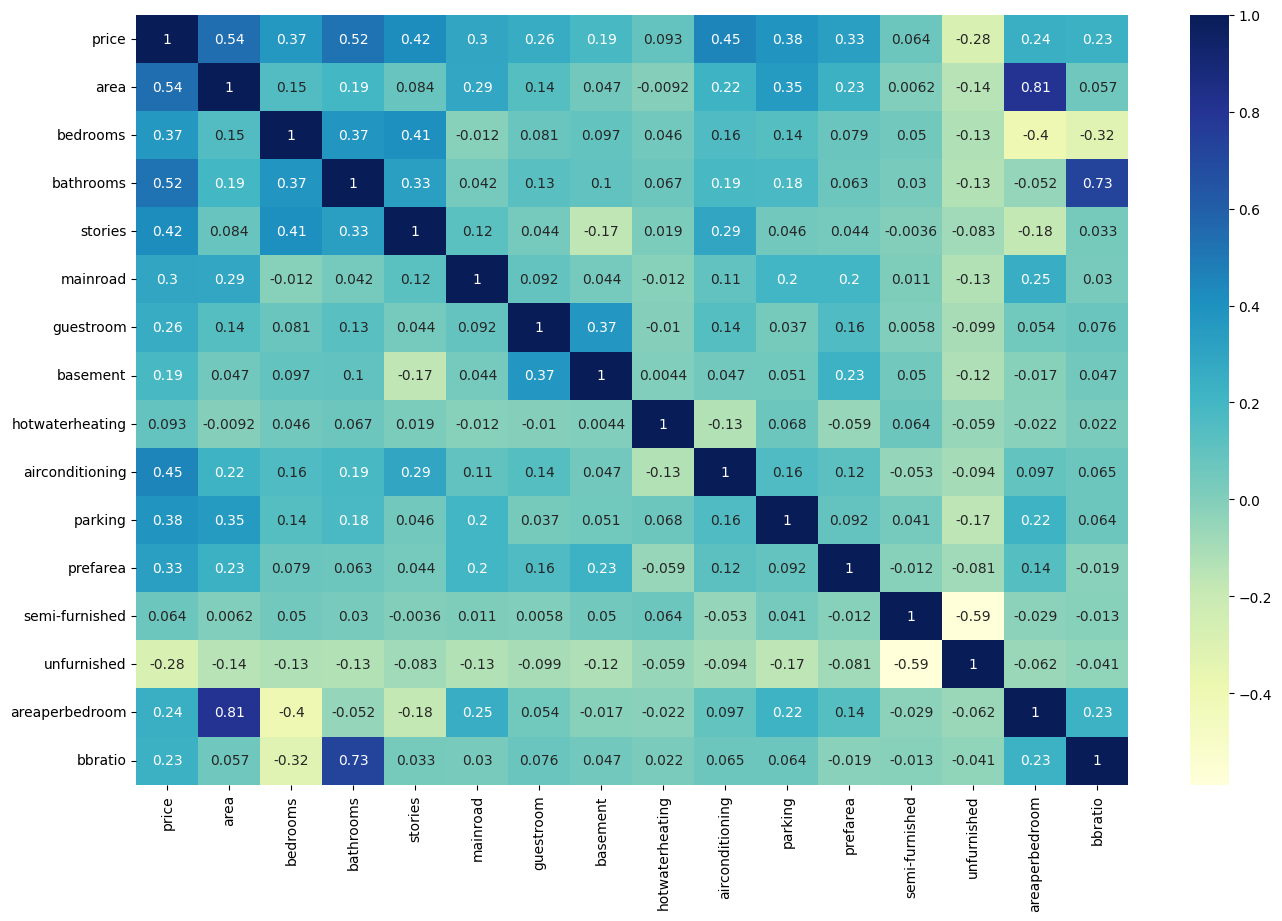

In [25]:
# Let's see the correlation matrix on hoousing data
plt.figure(figsize = (16,10))     # Size of the figure

# plot heatmap and pass correlation matrix with annot parameter

sns.heatmap(housing.corr(),cmap='YlGnBu',annot=True)

### Checking VIF

Multicollinearity can be detected via various methods. In this assignemnt, we will focus on the most common one – VIF (Variable Inflation Factors).<br>
VIF score of an independent variable represents how well the variable is explained by other independent variables.
1. VIF starts at 1 and has no upper limit
2. VIF = 1, no correlation between the independent variable and the other variables
3. VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

Although correlation matrix and scatter plots can also be used to find multicollinearity, their findings only show the bivariate relationship between the independent variables. VIF is preferred as it can show the correlation of a variable with a group of other variables.

Lets define a function vif_scores that takes a dataframe with relevant input features and returns a dataframe with two columns
1. variables which  has feature name
2. VIF which has vif score for corresponding feature

Please do have patience to run this function again and again as you will be required to drop all the variables one by one with high vif (>5).

So lets impliment it.


Reference : https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/

In [26]:
X.values

array([[1.32999998e+07, 7.41988660e+03, 3.80000000e+00, ...,
        0.00000000e+00, 1.85493874e+03, 3.00000000e-01],
       [1.22499998e+07, 8.95988660e+03, 3.80000000e+00, ...,
        0.00000000e+00, 2.23993874e+03, 8.00000000e-01],
       [1.22499998e+07, 9.95988660e+03, 2.80000000e+00, ...,
        0.00000000e+00, 3.31993874e+03, 4.66666667e-01],
       ...,
       [1.74999985e+06, 3.61988660e+03, 1.80000000e+00, ...,
        1.00000000e+00, 1.80993874e+03, 3.00000000e-01],
       [1.74999985e+06, 2.90988660e+03, 2.80000000e+00, ...,
        0.00000000e+00, 9.69938736e+02, 1.33333333e-01],
       [1.74999985e+06, 3.84988660e+03, 2.80000000e+00, ...,
        1.00000000e+00, 1.28327207e+03, 1.33333333e-01]])

In [27]:
# import variance_inflation_factor module

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Define vif_scores function as stated above
def vif_scores(input_data):
    vif=pd.DataFrame()
    vif["variables"]=input_data.columns
    vif["vifscore"] = [variance_inflation_factor(input_data.values,i) for i in range(input_data.shape[1])]
    return vif.sort_values(by="vifscore",ascending=False,)

# print vif scores for all current input features
vif_scores(X)



,variables,vifscore
1,area,98.478495
14,areaperbedroom,86.140284
3,bathrooms,69.775093
15,bbratio,45.533422
2,bedrooms,24.967619
0,price,23.462011
5,mainroad,8.053000
4,stories,6.352909
12,semi-furnished,2.576714
13,unfurnished,2.355768


### Dropping the Variable and Updating the Model

Dropping highly correlated variables and insignificant variables through both correlation matrix and vif scores.

As you can see there are two groups of multicollinear variables. 
1. areaperbedroom and area
2. bbratio and bathrooms

the first group is neccesary for us to keep as it gives us relevant impact on traget, but from second set as we know that bbratio is not as significant as bathrooms, so we will drop it off.


In [30]:
# Lets check vif scores again after removing bbratio from features.

vif_scores(X.drop(['bbratio','areaperbedroom','bedrooms','semi-furnished','price','basement'],1))


<ipython-input-30-cf00be26c1c9>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  vif_scores(X.drop(['bbratio','areaperbedroom','bedrooms','semi-furnished','price','basement'],1))


,variables,vifscore
0,area,7.243552
3,mainroad,6.189722
1,bathrooms,4.953495
2,stories,4.440644
7,parking,1.980469
6,airconditioning,1.745131
8,prefarea,1.438326
9,unfurnished,1.384980
4,guestroom,1.296314
5,hotwaterheating,1.087831


As you can see the vif scores are still high. Lets drop bedroom also as input feature and again check vif scores.


Well done. Now we have vif scores less than 5 

So in total  we have removed 5 features namely "bedrooms","bbratio","areaperbedroom","semi-furnished" and "basement".

Wohoo! we have our final list of input features. Lets drop these 5 features from X_train as well and rebuild ypur model.

## Making Predictions by rebuilding Model

<p style='text-align: right;'> 5 points</p>


Lets do another test train split after dropping highly correlated variables and insignificant variables from X.


In [ ]:
# Putting feature variable to X
X = 


# Putting response variable to y ie. price
y = 


In [ ]:
# test train split again on X and y
X_train, X_test, y_train, y_test = 



Building our linear model again

In [ ]:
# Adding a constant column to our dataframe
X_train = 
   


# Adding  constant variable to test dataframe
X_test = 


# create a second fitted model
lm_2 = 


In [ ]:
#print model 2 summary



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Wed, 26 May 2021   Prob (F-statistic):           2.73e-84
Time:                        17:06:05   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0319      0.015     

In [ ]:
# Making predictions
y_pred = 


## Model Evaluation

<p style='text-align: right;'> 8 points</p>
 


The skill or performance of a regression model must be reported as an error in those predictions.
You don’t want to know if the model predicted the value exactly (this might be intractably difficult in practice); instead, we want to know how close the predictions were to the expected values.

Error addresses exactly this and summarizes on average how close predictions were to their expected values.



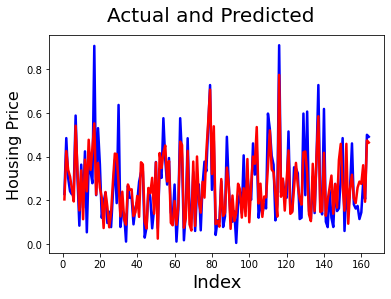

In [ ]:
# Actual vs Predicted graph as below
c = [i for i in range(1,165,1)]
fig = plt.figure()

#Plotting Actual
 

#Plotting predicted
 

 # Plot heading 
  

# X-label
           
# Y-label                  
                      
plt.show()#showing the plot

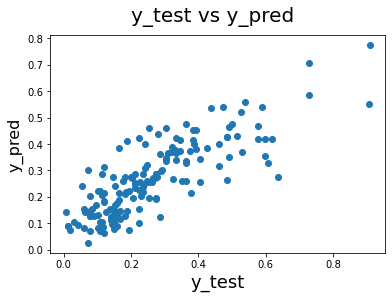

In [ ]:
# Plotting y_test and y_pred scatter plot to understand the spread.
fig = plt.figure()


# Plot heading 
    

# X-label
               

# Y-label
                       
plt.show()

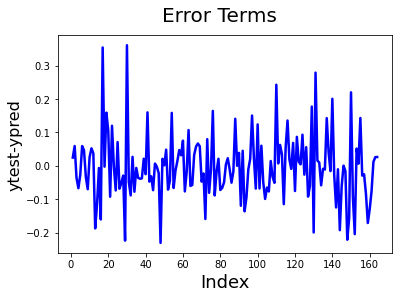

In [ ]:
# Plotting line chart of Error terms
fig = plt.figure()


 # Plot heading
      

# X-label
        

 # Y-label
               
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


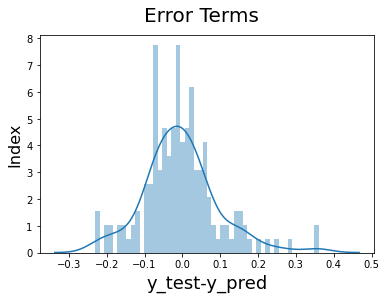

In [ ]:
# Plotting the error terms as dist plot to understand the distribution.
fig = plt.figure()





**Regression Metrics**

<p style='text-align: right;'> 6 points</p>

There are three error metrics that are commonly used for evaluating and reporting the performance of a regression model; they are:

1. Mean Squared Error (MSE).
2. Root Mean Squared Error (RMSE).
3. Mean Absolute Error (MAE)

There are many other metrics for regression, although these are the most commonly used. You can see the full list of regression metrics supported by the scikit-learn Python machine learning library here:

https://scikit-learn.org/stable/modules/classes.html#regression-metrics


## **`Watch Video 6 : Metrics`**




In [ ]:
#import metrics module



#calculate and print RMSE


RMSE : 0.09834680988986308


In [ ]:
#calculate and print MSE




MSE : 0.009672095015512869


In [ ]:
#calculate and print MAE




MAE : 0.07207530515287307


## Feature Selection

<p style='text-align: right;'> 6 points</p>


Once you have obtained your initial error metric/s, take note of which X’s have minimal impacts on y. Removing some of these features may result in an increased accuracy of your model.

So, We begin a process of trial and error, where the process is started over again, until a satisfactory model is produced.

To do this we already have a ready made library called RFE. 
So lets do feature selection using RFE using LinearRegression module.




Reference: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

In [ ]:
# Importing RFE and LinearRegression



In [ ]:
# Initializing linearRegression function 
lm = 


# Iitialising RFE using above model
rfe = 
       

# Fitting and running RFE with X_train and y_train
rfe = 


# Printing the boolean results for each features



# Printing the ranks for each features

 

[False  True  True  True False False False  True  True False  True False]
[7 1 1 1 3 4 6 1 1 2 1 5]


In [ ]:
#Print the total no. of features in X



#Get columns which are supported by RFE
col=


# print col




11
Index(['area', 'bathrooms', 'stories', 'hotwaterheating', 'airconditioning',
       'prefarea'],
      dtype='object')


As you can see that 6 features got selected out of initial 11 features.

## Visualising Data

<p style='text-align: right;'> 4 points</p>


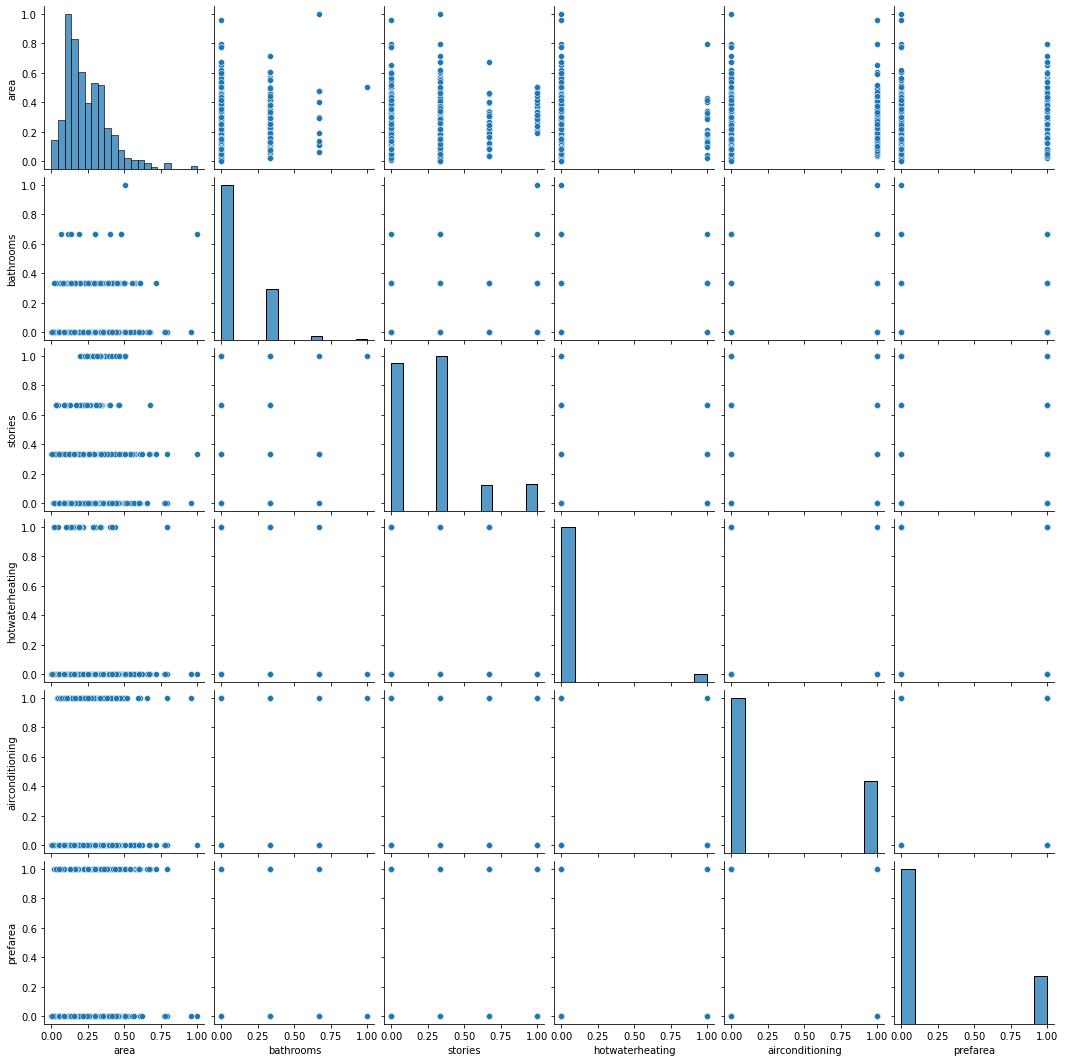

In [ ]:
# Let's plot a pair plot of all RFE selected variables in housing dataframe




C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


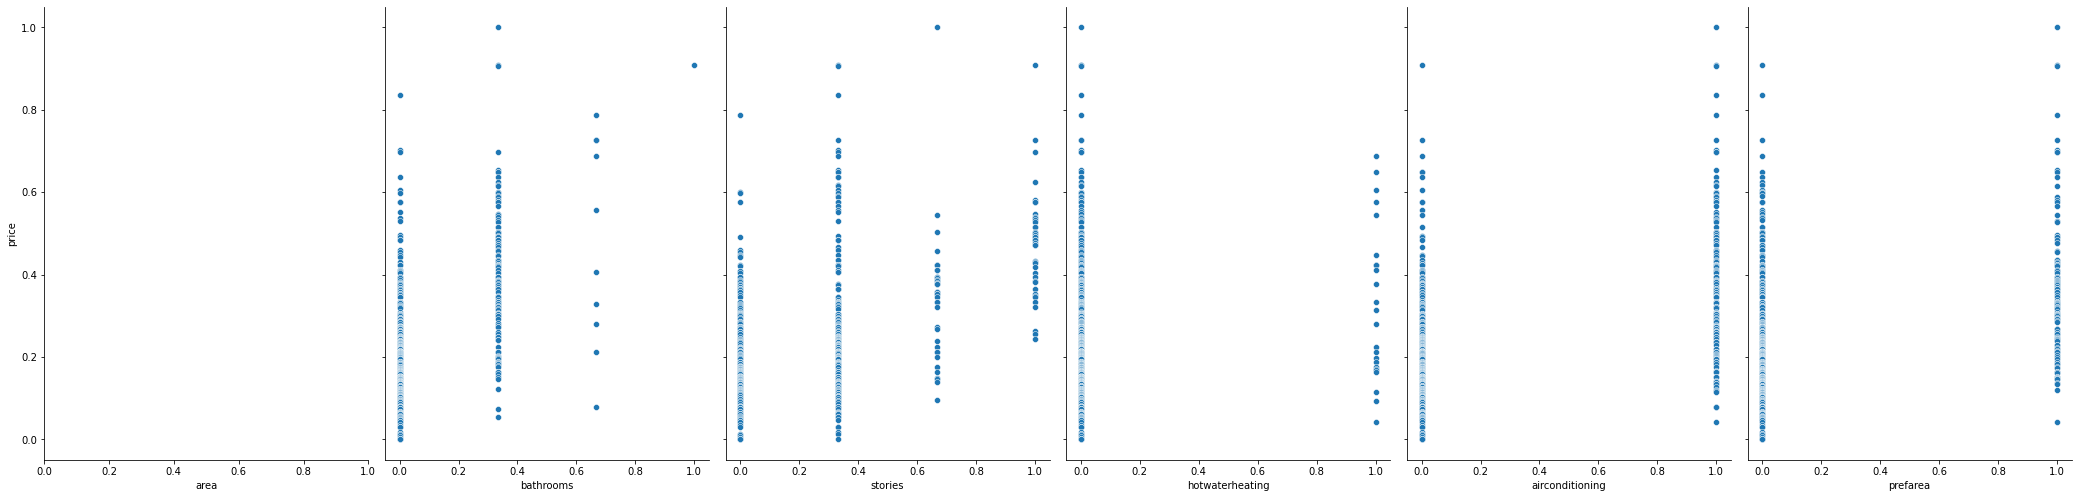

In [ ]:
# Visualise the relationship between the features and the response using scatterplots



So above you can see that the relationship between target and features shows some constant relation.
Lets try our luck if this model performs better that you last model.


## Building model again with above selected features.

<p style='text-align: right;'> 8 points</p>


So this would be your third model

In [ ]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = 


In [ ]:
# Adding a constant variable in X_train_rfe
X_train_rfe = 


In [ ]:
# fitting your third linear model with y_train and X_train_rfe
lm_3 = 
  

In [ ]:
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     106.7
Date:                Wed, 26 May 2021   Prob (F-statistic):           6.98e-78
Time:                        17:06:15   Log-Likelihood:                 353.86
No. Observations:                 381   AIC:                            -693.7
Df Residuals:                     374   BIC:                            -666.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0609      0.011     

In [ ]:
# Calculating Vif scores on housing data with selected columns by RFE




,variables,VIF
0,area,2.245213
2,stories,1.983682
4,airconditioning,1.714386
1,bathrooms,1.546979
5,prefarea,1.384793
3,hotwaterheating,1.064857


Wohoo! all these features looks good .

Now let's use our model to make predictions.


In [ ]:
# Creating X_test dataframe with RFE selected variables
X_test_rfe = 


# Adding a constant variable to X_test_rfe
X_test_rfe = 


# Making predictions
y_pred = 


Now again lets evaluate oour third model.



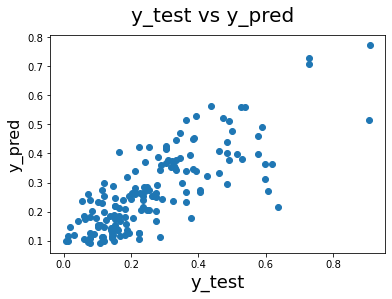

In [ ]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()



In [ ]:
# Print RMSE, MSE and MAE scores for your third model





RMSE : 0.10615015826267064
MSE : 0.011267856099190026
MAE : 0.07902347035966725


## Model Selection

<p style='text-align: right;'> 4 points</p>


Seeing the results we can see that there is not much change in  model performance compared to your second model.
Infact rmse score got increased. The reason could be that we might have removed a/some features which were of importance.

May be your linear model wants some other features also to explain your target variable. 

We want you to underatand summary of all three models together

In [ ]:
#print summary of all 3 built models




                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     53.12
Date:                Wed, 26 May 2021   Prob (F-statistic):           4.56e-82
Time:                        17:06:15   Log-Likelihood:                 384.40
No. Observations:                 381   AIC:                            -736.8
Df Residuals:                     365   BIC:                            -673.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0603      0.059     

# 
# 
# 
# 
We understand that these summary shows a lot of data to understand. Don't worry if you don't understand right now, no fear when AI for All is here.
This time we won't go in details but, we would like to tell you how to iterpret model by looking into few metric

1. **Coef**: Regression coefficients represent the mean change in the response variable for one unit of change in the predictor variable while holding other predictors in the model constant. This statistical control that regression provides is important because it isolates the role of one variable from all of the others in the model.

So its obvious that more the coefficient more important is the feature.

![image.png](attachment:image.png)

2.**R-squared**: It signifies the “percentage variation in dependent that is explained by independent variables”. Here, 73.2% variation in y is explained by X1, X2, X3, X4 and X5. This statistic has a drawback, it increases with the number of predictors(dependent variables) increase. Therefore, it becomes inconclusive in case when it is to be decided whether additional variable is adding to the predictability power of the regression.

![image-2.png](attachment:image-2.png)


3. **Adj. R-squared**: This is the modified version of R-squared which is adjusted for the number of variables in the regression. It increases only when an additional variable adds to the explanatory power to the regression.

We gave you three metric explaination. Now just try to compare these things in all three models.
You will see that second model is perfoming better in terms of coefficient, R2 and adjusted r2. Also if you see metrics you calculated for model 2 and model 3, the second model is better there also.


So we can finalise that our second model is the best model to solve our problem statement ie.to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.


# **`Summary`**

- We learnt assumptions required for multiple regression model and its advantages/disadvantages.
- We built multiple regression model using statsmodel and also got the basic idea of choosing best features using multicollinearity and VIF.
- We built the best model using the selected features by looking the different metrics like R2, coeff and p value . 

---------------------
# Have a break now ! Congrats..you have completed your 10th milestone challenge

----------------

# FeedBack Time

We hope you’ve enjoyed this course so far. We’re committed to help you use "AI for All" course to its full potential, so that you have a great learning experience. And that’s why we need your help in form of a feedback here.

Please fill this feedback form https://forms.gle/UXJwHK9Ei8eY9V1W9